In [34]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [35]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
  accuracy_score, classification_report, confusion_matrix,
  f1_score, precision_score, recall_score, roc_auc_score, roc_curve
)

# Configurações
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('✅ Bibliotecas importadas com sucesso!')

✅ Bibliotecas importadas com sucesso!


In [36]:
# Carregar dataset
df = pd.read_csv('/content/diabetes.csv')

print('='*80)
print('DATASET CARREGADO')
print('='*80)
print(f'- Dimensões: {df.shape[0]} registros × {df.shape[1]} colunas')
print(f'- Colunas: {list(df.columns)}')
print(f'\n✅ Dataset carregado com sucesso!\n')

# Mostrar primeiras linhas
print("Primeiras 10 linhas do dataset:")
df.head(10)

DATASET CARREGADO
- Dimensões: 995 registros × 3 colunas
- Colunas: ['glicemia', 'pressao_arterial', 'diabetes']

✅ Dataset carregado com sucesso!

Primeiras 10 linhas do dataset:


,glicemia,pressao_arterial,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
5,45,82,0
6,40,85,0
7,30,63,1
8,65,65,1
9,45,82,0


In [37]:
print('='*80)
print('INFORMAÇÕES DO DATASET')
print('='*80)
print()
df.info()

print('\n' + '='*80)
print('VERIFICAÇÃO DE QUALIDADE DOS DADOS')
print('='*80)
print(f'- Valores Nulos: {df.isnull().sum().sum()}')
print(f'- Duplicatas:    {df.duplicated().sum()}')

INFORMAÇÕES DO DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   glicemia          995 non-null    int64
 1   pressao_arterial  995 non-null    int64
 2   diabetes          995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB

VERIFICAÇÃO DE QUALIDADE DOS DADOS
- Valores Nulos: 0
- Duplicatas:    820


In [38]:
print('='*80)
print('ESTATÍSTICAS DESCRITIVAS')
print('='*80)
df.describe()

ESTATÍSTICAS DESCRITIVAS


,glicemia,pressao_arterial,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


In [39]:
print('='*80)
print('DISTRIBUIÇÃO DAS CLASSES')
print('='*80)

class_counts = df['diabetes'].value_counts()
class_percentages = df['diabetes'].value_counts(normalize=True) * 100

print(f'- Sem Diabetes (0): {class_counts[0]} amostras ({class_percentages[0]:.2f}%)')
print(f'- Com Diabetes (1): {class_counts[1]} amostras ({class_percentages[1]:.2f}%)')
print(f'\n✅ Dataset balanceado!' if abs(class_percentages[0] - class_percentages[1]) < 5 else '⚠️ Dataset desbalanceado')

# Visualizar distribuição
class_counts

DISTRIBUIÇÃO DAS CLASSES
- Sem Diabetes (0): 497 amostras (49.95%)
- Com Diabetes (1): 498 amostras (50.05%)

✅ Dataset balanceado!


,count
diabetes,
1,498
0,497


In [40]:
print('='*80)
print('ESTATÍSTICAS POR CLASSE')
print('='*80)

print('\nSEM DIABETES (Classe 0):')
print(df[df['diabetes'] == 0][['glicemia', 'pressao_arterial']].describe())

print('\nCOM DIABETES (Classe 1):')
print(df[df['diabetes'] == 1][['glicemia', 'pressao_arterial']].describe())

ESTATÍSTICAS POR CLASSE

SEM DIABETES (Classe 0):
         glicemia  pressao_arterial
count  497.000000        497.000000
mean    44.094567         86.738431
std      3.700631          4.590048
min     35.000000         73.000000
25%     40.000000         83.000000
50%     45.000000         87.000000
75%     45.000000         90.000000
max     55.000000        100.000000

COM DIABETES (Classe 1):
         glicemia  pressao_arterial
count  498.000000        498.000000
mean    44.518072         71.646586
std      8.730752          6.281428
min     20.000000         50.000000
25%     40.000000         67.000000
50%     45.000000         72.000000
75%     50.000000         75.000000
max     70.000000         88.000000


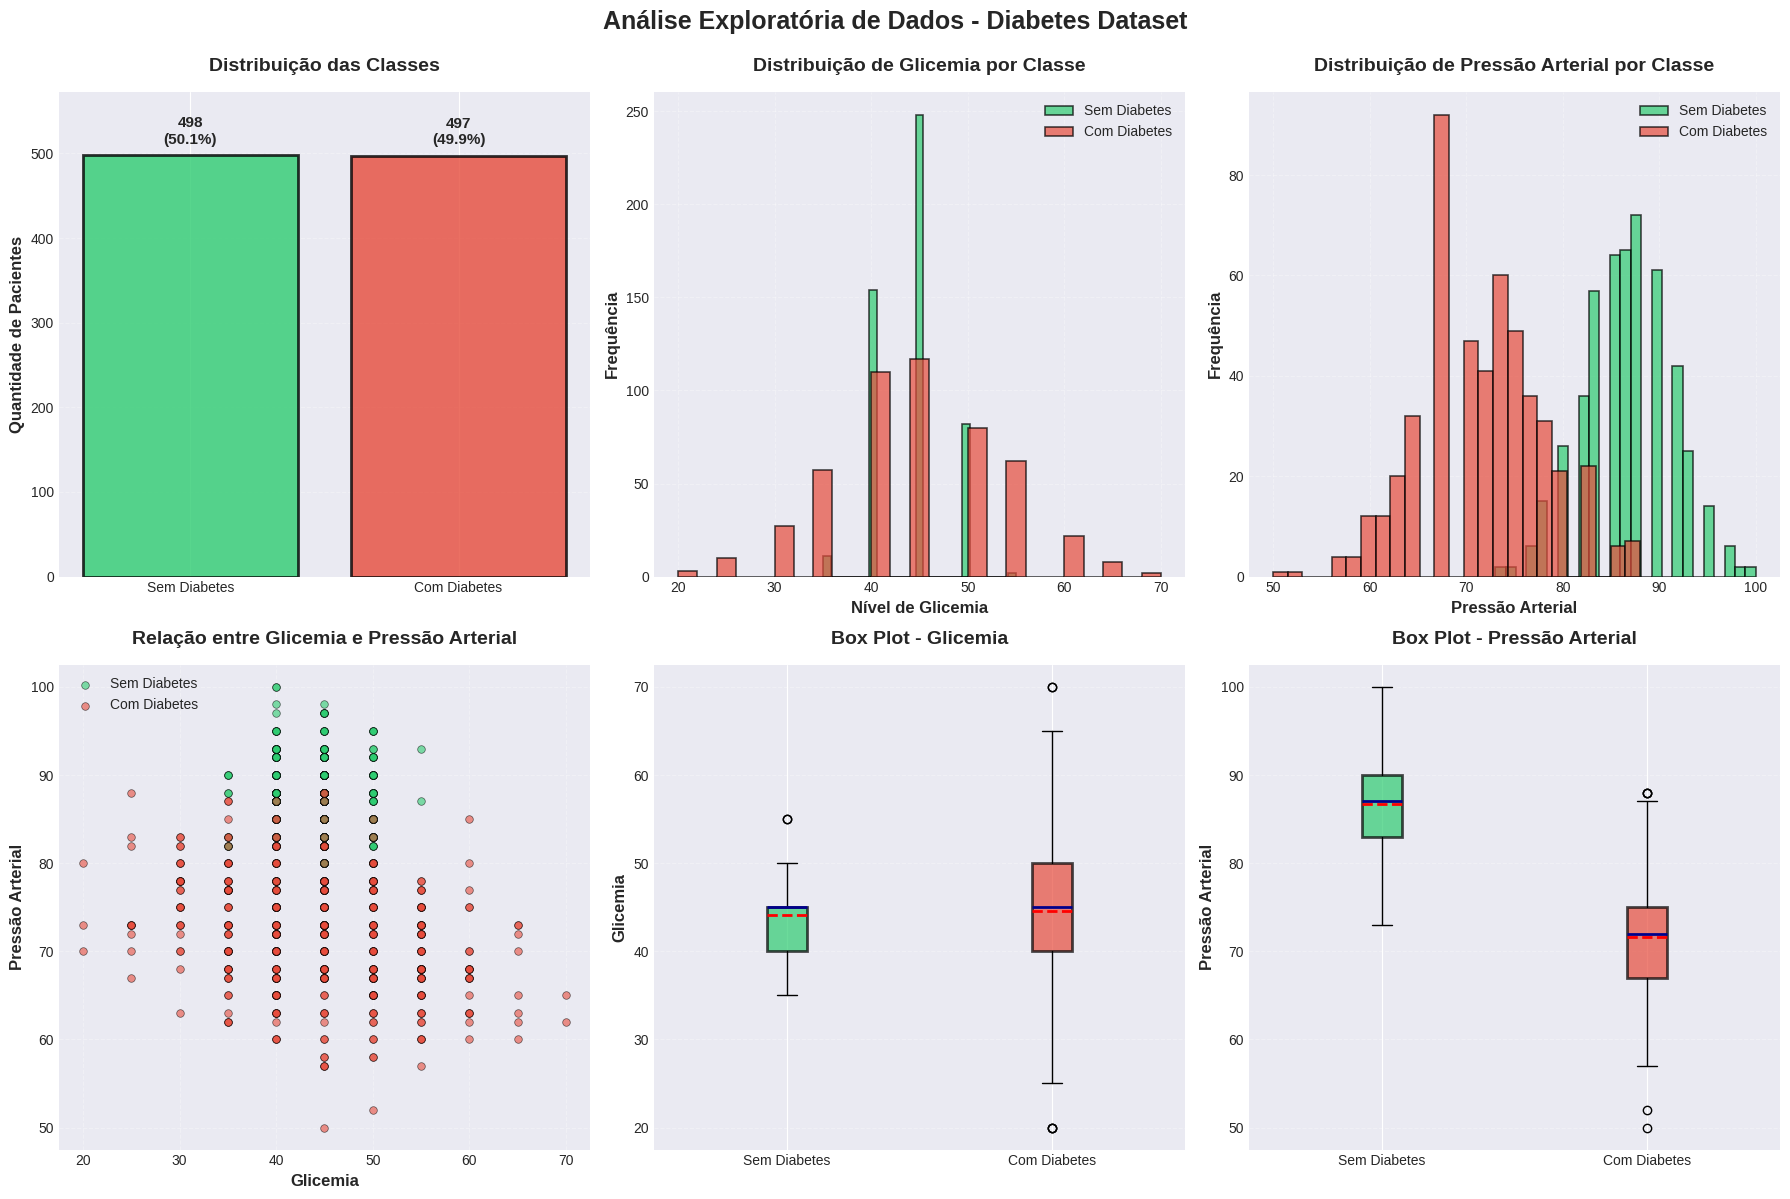


✅ Visualizações da EDA geradas com sucesso!


In [41]:
# Criar figura com 6 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análise Exploratória de Dados - Diabetes Dataset', fontsize=18, fontweight='bold', y=0.995)

colors = ['#2ecc71', '#e74c3c']  # Verde e Vermelho

# 1. DISTRIBUIÇÃO DAS CLASSES
ax1 = axes[0, 0]
class_counts = df['diabetes'].value_counts()
bars = ax1.bar(['Sem Diabetes', 'Com Diabetes'], class_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_ylabel('Quantidade de Pacientes', fontsize=12, fontweight='bold')
ax1.set_title('Distribuição das Classes', fontsize=14, fontweight='bold', pad=15)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim(0, max(class_counts.values) * 1.15)

# Adicionar valores nas barras
for i, (bar, v) in enumerate(zip(bars, class_counts.values)):
  height = bar.get_height()
  ax1.text(
    bar.get_x() + bar.get_width() / 2., height + 10, f'{v}\n({v/len(df)*100:.1f}%)',
    ha='center', va='bottom', fontweight='bold', fontsize=11)

# 2. HISTOGRAMA DE GLICEMIA
ax2 = axes[0, 1]
for diabetes_class in [0, 1]:
  label = 'Sem Diabetes' if diabetes_class == 0 else 'Com Diabetes'
  color = colors[diabetes_class]
  data = df[df['diabetes'] == diabetes_class]['glicemia']
  ax2.hist(data, bins=25, alpha=0.7, label=label, color=color, edgecolor='black', linewidth=1.2)

ax2.set_xlabel('Nível de Glicemia', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequência', fontsize=12, fontweight='bold')
ax2.set_title('Distribuição de Glicemia por Classe', fontsize=14, fontweight='bold', pad=15)
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(alpha=0.3, linestyle='--')

# 3. HISTOGRAMA DE PRESSÃO ARTERIAL
ax3 = axes[0, 2]
for diabetes_class in [0, 1]:
  label = 'Sem Diabetes' if diabetes_class == 0 else 'Com Diabetes'
  color = colors[diabetes_class]
  data = df[df['diabetes'] == diabetes_class]['pressao_arterial']
  ax3.hist(data, bins=25, alpha=0.7, label=label, color=color, edgecolor='black', linewidth=1.2)

ax3.set_xlabel('Pressão Arterial', fontsize=12, fontweight='bold')
ax3.set_ylabel('Frequência', fontsize=12, fontweight='bold')
ax3.set_title('Distribuição de Pressão Arterial por Classe', fontsize=14, fontweight='bold', pad=15)
ax3.legend(loc='upper right', fontsize=10)
ax3.grid(alpha=0.3, linestyle='--')

# 4. SCATTER PLOT
ax4 = axes[1, 0]
for diabetes_class in [0, 1]:
  label = 'Sem Diabetes' if diabetes_class == 0 else 'Com Diabetes'
  color = colors[diabetes_class]
  data = df[df['diabetes'] == diabetes_class]
  ax4.scatter(
    data['glicemia'], data['pressao_arterial'], alpha=0.6, label=label, color=color, s=30, edgecolors='black', linewidth=0.5)

ax4.set_xlabel('Glicemia', fontsize=12, fontweight='bold')
ax4.set_ylabel('Pressão Arterial', fontsize=12, fontweight='bold')
ax4.set_title('Relação entre Glicemia e Pressão Arterial', fontsize=14, fontweight='bold', pad=15)
ax4.legend(loc='upper left', fontsize=10)
ax4.grid(alpha=0.3, linestyle='--')

# 5. BOX PLOT GLICEMIA
ax5 = axes[1, 1]
diabetes_data = [df[df['diabetes'] == 0]['glicemia'], df[df['diabetes'] == 1]['glicemia']]
bp1 = ax5.boxplot(
  diabetes_data, labels=['Sem Diabetes', 'Com Diabetes'], patch_artist=True, showmeans=True, meanline=True,
  boxprops=dict(linewidth=2), medianprops=dict(color='darkblue', linewidth=2), meanprops=dict(color='red', linewidth=2, linestyle='--'))

for patch, color in zip(bp1['boxes'], colors):
  patch.set_facecolor(color)
  patch.set_alpha(0.7)

ax5.set_ylabel('Glicemia', fontsize=12, fontweight='bold')
ax5.set_title('Box Plot - Glicemia', fontsize=14, fontweight='bold', pad=15)
ax5.grid(axis='y', alpha=0.3, linestyle='--')

# 6. BOX PLOT PRESSÃO ARTERIAL
ax6 = axes[1, 2]
pressure_data = [df[df['diabetes'] == 0]['pressao_arterial'], df[df['diabetes'] == 1]['pressao_arterial']]
bp2 = ax6.boxplot(
  pressure_data, labels=['Sem Diabetes', 'Com Diabetes'], patch_artist=True, showmeans=True, meanline=True,
  boxprops=dict(linewidth=2), medianprops=dict(color='darkblue', linewidth=2), meanprops=dict(color='red', linewidth=2, linestyle='--'))

for patch, color in zip(bp2['boxes'], colors):
  patch.set_facecolor(color)
  patch.set_alpha(0.7)

ax6.set_ylabel('Pressão Arterial', fontsize=12, fontweight='bold')
ax6.set_title('Box Plot - Pressão Arterial', fontsize=14, fontweight='bold', pad=15)
ax6.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print('\n✅ Visualizações da EDA geradas com sucesso!')


Com base nas visualizações acima, podemos observar:

1. **Balanceamento**: O dataset está bem balanceado (~50% cada classe)
2. **Glicemia**: Parece haver uma diferença nos níveis de glicemia entre as classes
3. **Pressão Arterial**: Também mostra diferença entre as classes
4. **Correlação**: Os scatter plots sugerem que as features podem ser úteis para classificação
5. **Outliers**: Os box plots ajudam a identificar possíveis outliers nos dados


In [42]:
print('='*80)
print('PRÉ-PROCESSAMENTO DOS DADOS')
print('='*80)

# Separar features (X) e target (y)
X = df[['glicemia', 'pressao_arterial']].values
y = df['diabetes'].values

print(f'Features (X): {X.shape}')
print(f'Target (y): {y.shape}')

# Dividir em conjunto de treino e teste (80/20) com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'\nDivisão dos Dados:')
print(f'- Treino: {len(X_train)} amostras (80%)')
print(f'- Teste:  {len(X_test)} amostras (20%)')

# Normalização dos dados com StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'\nDados normalizados com StandardScaler')
print(f'\nEstatísticas após normalização (Treino):')
print(f'- Média: {X_train_scaled.mean(axis=0)}')
print(f'- Desvio Padrão: {X_train_scaled.std(axis=0)}')
print(f'\n Pré-processamento concluído!')


PRÉ-PROCESSAMENTO DOS DADOS
Features (X): (995, 2)
Target (y): (995,)

Divisão dos Dados:
- Treino: 796 amostras (80%)
- Teste:  199 amostras (20%)

Dados normalizados com StandardScaler

Estatísticas após normalização (Treino):
- Média: [-6.11459515e-16 -6.49117834e-16]
- Desvio Padrão: [1. 1.]

 Pré-processamento concluído!


In [43]:
print('='*80)
print('TREINAMENTO DO MODELO')
print('='*80)

# Criar o modelo Gaussian Naive Bayes
model = GaussianNB()

print(f'\n🤖 Algoritmo: Gaussian Naive Bayes')
print(f'⏳ Iniciando treinamento...\n')

# Treinar o modelo
model.fit(X_train_scaled, y_train)

print('Modelo treinado com sucesso!')

# Mostrar parâmetros do modelo
print(f'\nParâmetros do Modelo:')
print(f'- Classes: {model.classes_}')
print(f'- Prior das classes: {model.class_prior_}')
print(f'- Theta (média): {model.theta_}')
print(f'- Sigma (variância): {model.var_}')


TREINAMENTO DO MODELO

🤖 Algoritmo: Gaussian Naive Bayes
⏳ Iniciando treinamento...

Modelo treinado com sucesso!

Parâmetros do Modelo:
- Classes: [0 1]
- Prior das classes: [0.5 0.5]
- Theta (média): [[-0.0239767   0.81238015]
 [ 0.0239767  -0.81238015]]
- Sigma (variância): [[0.32557288 0.23442543]
 [1.67327735 0.44565157]]


In [44]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print('Predições realizadas com sucesso!')

Predições realizadas com sucesso!


In [45]:
print('='*80)
print('MÉTRICAS DE DESEMPENHO DO MODELO')
print('='*80)

# Calcular métricas
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'\nCONJUNTO DE TREINO:')
print(f'- Acurácia: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)')

print(f'\nCONJUNTO DE TESTE:')
print(f'- {'Acurácia (Accuracy):':<30} {test_accuracy:.4f} ({test_accuracy*100:.2f}%)')
print(f'- {'Precisão (Precision):':<30} {precision:.4f} ({precision*100:.2f}%)')
print(f'- {'Revocação (Recall):':<30} {recall:.4f} ({recall*100:.2f}%)')
print(f'- {'F1-Score:':<30} {f1:.4f} ({f1*100:.2f}%)')
print(f'- {'ROC-AUC Score:':<30} {roc_auc:.4f} ({roc_auc*100:.2f}%)')

# Calcular diferença entre treino e teste
diff = abs(train_accuracy - test_accuracy)
print(f'\nDiferença Treino-Teste: {diff:.4f} ({diff*100:.2f}%)')
if diff < 0.05:
  print('Modelo generaliza bem (sem overfitting significativo)')
else:
  print('Possível overfitting detectado!')

MÉTRICAS DE DESEMPENHO DO MODELO

CONJUNTO DE TREINO:
- Acurácia: 0.9397 (93.97%)

CONJUNTO DE TESTE:
- Acurácia (Accuracy):           0.9095 (90.95%)
- Precisão (Precision):          0.9100 (91.00%)
- Revocação (Recall):            0.9100 (91.00%)
- F1-Score:                      0.9100 (91.00%)
- ROC-AUC Score:                 0.9758 (97.58%)

Diferença Treino-Teste: 0.0302 (3.02%)
Modelo generaliza bem (sem overfitting significativo)


In [46]:
print('='*80)
print('VALIDAÇÃO CRUZADA ESTRATIFICADA (5-FOLD)')
print('='*80)

# Realizar validação cruzada
cv_scores = cross_val_score(
  model, X_train_scaled, y_train, scoring='accuracy',
  cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

print(f'\nScores por Fold:')
for i, score in enumerate(cv_scores, 1):
  print(f'- Fold {i}: {score:.4f} ({score*100:.2f}%)')

print(f'\nEstatísticas da Validação Cruzada:')
print(f'- Média:         {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)')
print(f'- Desvio Padrão: {cv_scores.std():.4f} ({cv_scores.std()*100:.2f}%)')
print(f'- Mínimo:        {cv_scores.min():.4f} ({cv_scores.min()*100:.2f}%)')
print(f'- Máximo:        {cv_scores.max():.4f} ({cv_scores.max()*100:.2f}%)')

print(f'\nValidação cruzada concluída!')

VALIDAÇÃO CRUZADA ESTRATIFICADA (5-FOLD)

Scores por Fold:
- Fold 1: 0.9563 (95.62%)
- Fold 2: 0.9245 (92.45%)
- Fold 3: 0.9371 (93.71%)
- Fold 4: 0.9371 (93.71%)
- Fold 5: 0.9371 (93.71%)

Estatísticas da Validação Cruzada:
- Média:         0.9384 (93.84%)
- Desvio Padrão: 0.0102 (1.02%)
- Mínimo:        0.9245 (92.45%)
- Máximo:        0.9563 (95.62%)

Validação cruzada concluída!


In [47]:
print('='*80)
print('RELATÓRIO DE CLASSIFICAÇÃO DETALHADO')
print('='*80)
print(classification_report(y_test, y_pred_test, target_names=['Sem Diabetes (0)', 'Com Diabetes (1)'], digits=4))


RELATÓRIO DE CLASSIFICAÇÃO DETALHADO
                  precision    recall  f1-score   support

Sem Diabetes (0)     0.9091    0.9091    0.9091        99
Com Diabetes (1)     0.9100    0.9100    0.9100       100

        accuracy                         0.9095       199
       macro avg     0.9095    0.9095    0.9095       199
    weighted avg     0.9095    0.9095    0.9095       199



In [48]:
# Calcular matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)

print('='*80)
print('MATRIZ DE CONFUSÃO')
print('='*80)
print(f'\n                    PREDITO')
print(f'                Neg (0)  Pos (1)')
print(f'REAL    Neg (0)    {cm[0,0]:>4}     {cm[0,1]:>4}')
print(f'        Pos (1)    {cm[1,0]:>4}     {cm[1,1]:>4}')

# Calcular métricas da matriz de confusão
tn, fp, fn, tp = cm.ravel()

print(f'\nDetalhamento:')
print(f'✅ Verdadeiros Negativos (TN): {tn}')
print(f'✅ Verdadeiros Positivos (TP): {tp}')
print(f'❌ Falsos Positivos (FP):      {fp}')
print(f'❌ Falsos Negativos (FN):      {fn}')

print(f'\nTaxas:')
print(f'- Taxa de Acerto:  {(tn + tp) / (tn + tp + fn + fp):.4f}')
print(f'- Taxa de Erro:    {(fn + fp) / (tn + tp + fn + fp):.4f}')


MATRIZ DE CONFUSÃO

                    PREDITO
                Neg (0)  Pos (1)
REAL    Neg (0)      90        9
        Pos (1)       9       91

Detalhamento:
✅ Verdadeiros Negativos (TN): 90
✅ Verdadeiros Positivos (TP): 91
❌ Falsos Positivos (FP):      9
❌ Falsos Negativos (FN):      9

Taxas:
- Taxa de Acerto:  0.9095
- Taxa de Erro:    0.0905


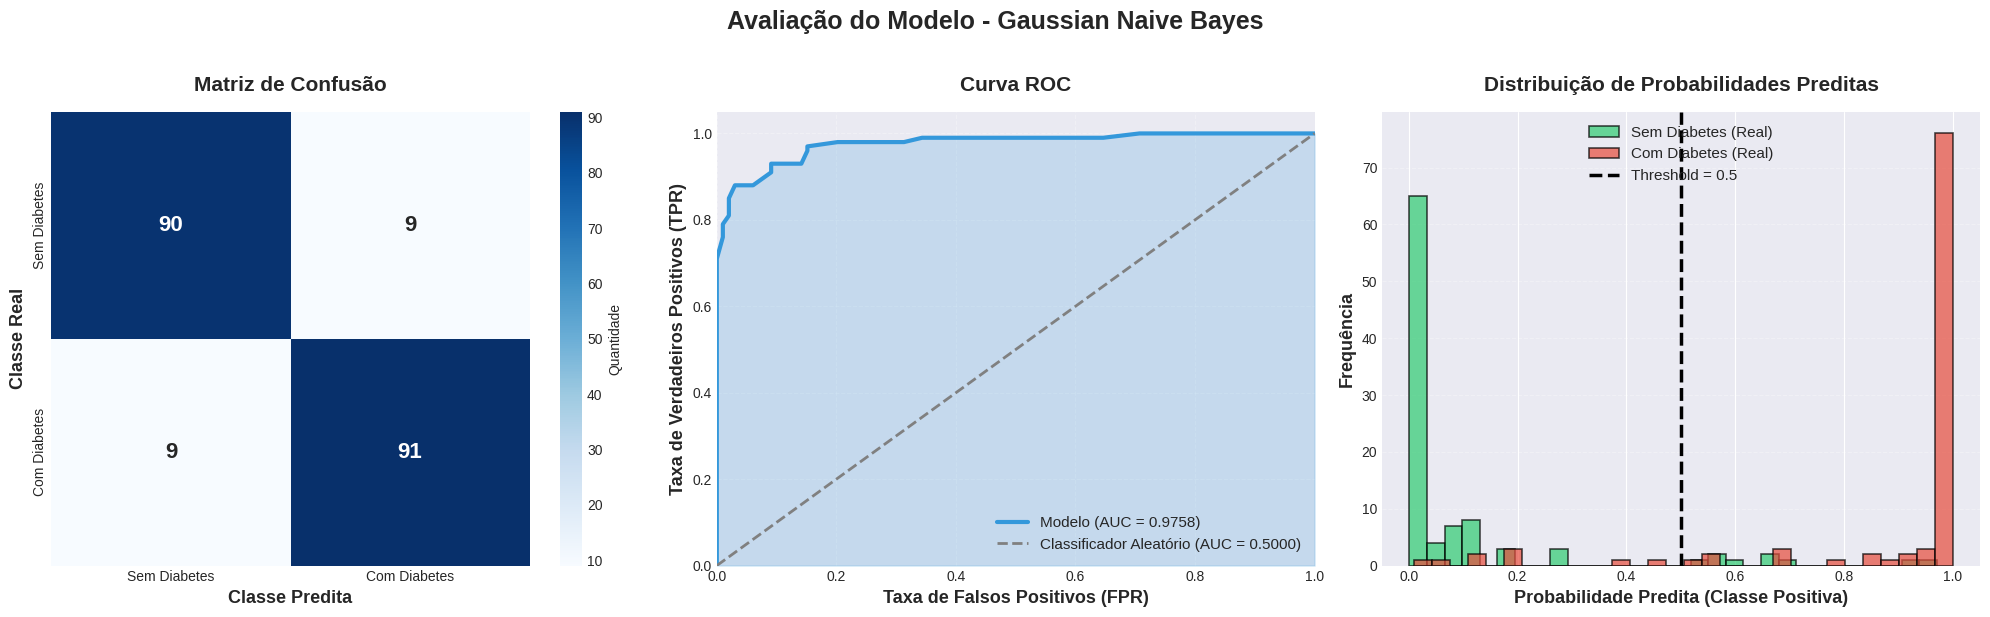


Visualizações de avaliação geradas com sucesso!


In [49]:
# Criar figura com 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Avaliação do Modelo - Gaussian Naive Bayes', fontsize=18, fontweight='bold', y=1.02)

# 1. MATRIZ DE CONFUSÃO VISUAL
ax1 = axes[0]
sns.heatmap(
  cm, annot=True, fmt='d', cmap='Blues', cbar=True, ax=ax1, xticklabels=['Sem Diabetes', 'Com Diabetes'],
  yticklabels=['Sem Diabetes', 'Com Diabetes'], annot_kws={'size': 16, 'weight': 'bold'}, cbar_kws={'label': 'Quantidade'})
ax1.set_ylabel('Classe Real', fontsize=13, fontweight='bold')
ax1.set_xlabel('Classe Predita', fontsize=13, fontweight='bold')
ax1.set_title('Matriz de Confusão', fontsize=15, fontweight='bold', pad=15)

# 2. CURVA ROC
ax2 = axes[1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

ax2.plot(fpr, tpr, color='#3498db', lw=3, label=f'Modelo (AUC = {roc_auc:.4f})')
ax2.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Classificador Aleatório (AUC = 0.5000)')
ax2.fill_between(fpr, tpr, alpha=0.2, color='#3498db')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Taxa de Falsos Positivos (FPR)', fontsize=13, fontweight='bold')
ax2.set_ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=13, fontweight='bold')
ax2.set_title('Curva ROC', fontsize=15, fontweight='bold', pad=15)
ax2.legend(loc='lower right', fontsize=11)
ax2.grid(alpha=0.3, linestyle='--')

# 3. DISTRIBUIÇÃO DE PROBABILIDADES
ax3 = axes[2]
proba_neg = y_pred_proba[y_test == 0]
proba_pos = y_pred_proba[y_test == 1]

ax3.hist(proba_neg, bins=30, alpha=0.7, label='Sem Diabetes (Real)', color='#2ecc71', edgecolor='black', linewidth=1.2)
ax3.hist(proba_pos, bins=30, alpha=0.7, label='Com Diabetes (Real)', color='#e74c3c', edgecolor='black', linewidth=1.2)
ax3.axvline(x=0.5, color='black', linestyle='--', linewidth=2.5, label='Threshold = 0.5')
ax3.set_xlabel('Probabilidade Predita (Classe Positiva)', fontsize=13, fontweight='bold')
ax3.set_ylabel('Frequência', fontsize=13, fontweight='bold')
ax3.set_title('Distribuição de Probabilidades Preditas', fontsize=15, fontweight='bold', pad=15)
ax3.legend(loc='upper center', fontsize=11)
ax3.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print('\nVisualizações de avaliação geradas com sucesso!')


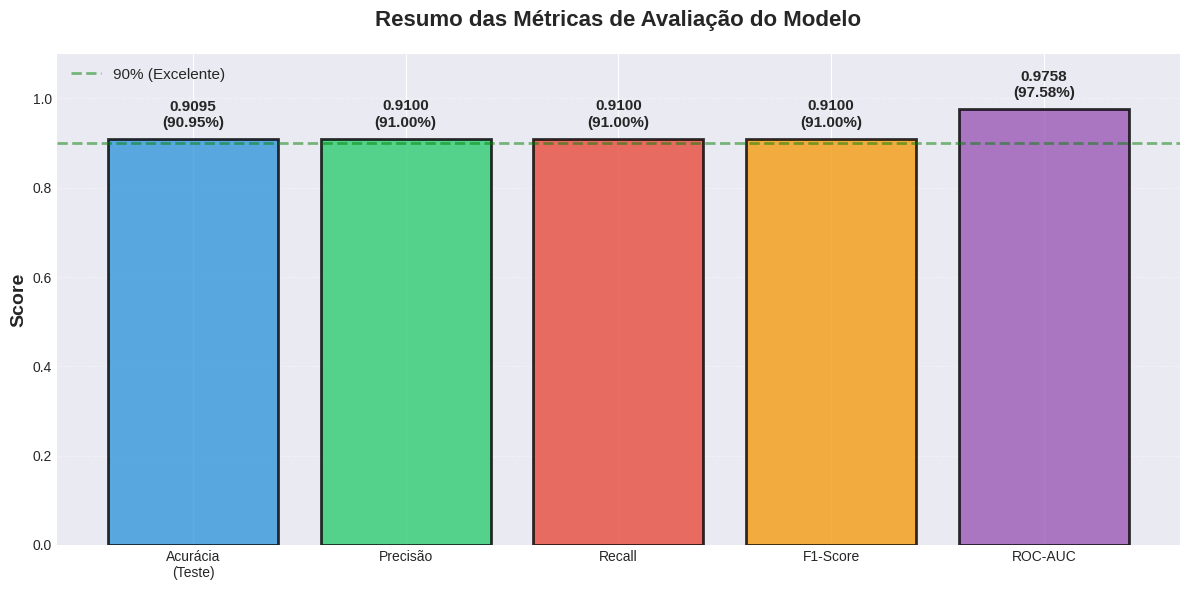


Gráfico de métricas gerado com sucesso!


In [50]:
# Criar gráfico de barras com as métricas
fig, ax = plt.subplots(figsize=(12, 6))

metrics = ['Acurácia\n(Teste)', 'Precisão', 'Recall', 'F1-Score', 'ROC-AUC']
values = [test_accuracy, precision, recall, f1, roc_auc]

colors_metrics = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']
bars = ax.bar(metrics, values, color=colors_metrics, alpha=0.8, edgecolor='black', linewidth=2)

ax.set_ylim(0, 1.1)
ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_title('Resumo das Métricas de Avaliação do Modelo', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.axhline(y=0.9, color='green', linestyle='--', linewidth=2, alpha=0.5, label='90% (Excelente)')

# Adicionar valores nas barras
for bar, value in zip(bars, values):
  height = bar.get_height()
  ax.text(
    bar.get_x() + bar.get_width()/2., height + 0.02,
    f'{value:.4f}\n({value*100:.2f}%)', ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.legend(fontsize=11)
plt.tight_layout()
plt.show()

print('\nGráfico de métricas gerado com sucesso!')

In [51]:
print('='*80)
print('DEMONSTRAÇÃO DE PREDIÇÕES EM NOVOS CASOS')
print('='*80)

# Definir casos de teste
test_cases = np.array([
  [45, 80],   # Caso 1: Valores médios/normais
  [120, 95],  # Caso 2: Valores muito altos (glicemia e pressão altas)
  [30, 60],   # Caso 3: Valores baixos
  [85, 88],   # Caso 4: Glicemia alta, pressão normal-alta
  [50, 120],  # Caso 5: Glicemia média, pressão muito alta
])

# Normalizar os casos de teste
test_cases_scaled = scaler.transform(test_cases)

# Fazer predições
predictions = model.predict(test_cases_scaled)
probabilities = model.predict_proba(test_cases_scaled)

print('\n🔮 Predições para Novos Pacientes:\n')
print('='*80)

for i, (case, pred, proba) in enumerate(zip(test_cases, predictions, probabilities), 1):
  resultado = '🔴 COM DIABETES' if pred == 1 else '🟢 SEM DIABETES'
  confianca = proba[pred] * 100

  print(f'\nCASO {i}:')
  print(f' - Glicemia:         {case[0]:.0f}')
  print(f' - Pressão Arterial: {case[1]:.0f}')
  print(f'───────────────────────────────────────')
  print(f' - Predição:         {resultado}')
  print(f' - Confiança:        {confianca:.2f}%')
  print(f'───────────────────────────────────────')
  print(f' - Probabilidades:')
  print(f'    • Sem Diabetes: {proba[0]:.4f} ({proba[0]*100:.2f}%)')
  print(f'    • Com Diabetes: {proba[1]:.4f} ({proba[1]*100:.2f}%)')
  print('='*80)

print('\nPredições concluídas com sucesso!')

DEMONSTRAÇÃO DE PREDIÇÕES EM NOVOS CASOS

🔮 Predições para Novos Pacientes:


CASO 1:
 - Glicemia:         45
 - Pressão Arterial: 80
───────────────────────────────────────
 - Predição:         🟢 SEM DIABETES
 - Confiança:        71.43%
───────────────────────────────────────
 - Probabilidades:
    • Sem Diabetes: 0.7143 (71.43%)
    • Com Diabetes: 0.2857 (28.57%)

CASO 2:
 - Glicemia:         120
 - Pressão Arterial: 95
───────────────────────────────────────
 - Predição:         🔴 COM DIABETES
 - Confiança:        100.00%
───────────────────────────────────────
 - Probabilidades:
    • Sem Diabetes: 0.0000 (0.00%)
    • Com Diabetes: 1.0000 (100.00%)

CASO 3:
 - Glicemia:         30
 - Pressão Arterial: 60
───────────────────────────────────────
 - Predição:         🔴 COM DIABETES
 - Confiança:        100.00%
───────────────────────────────────────
 - Probabilidades:
    • Sem Diabetes: 0.0000 (0.00%)
    • Com Diabetes: 1.0000 (100.00%)

CASO 4:
 - Glicemia:         85
 - Pressão 

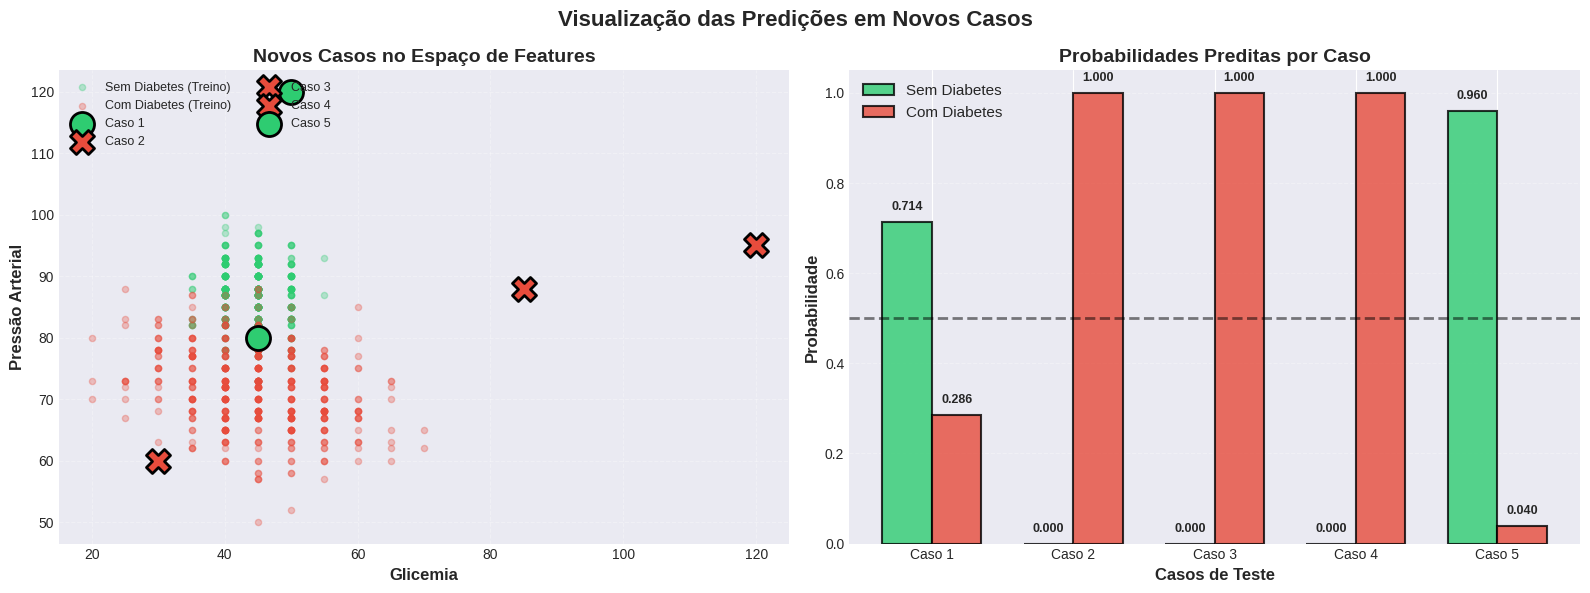


Visualização das predições gerada com sucesso!


In [52]:
# Criar visualização dos novos casos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Visualização das Predições em Novos Casos', fontsize=16, fontweight='bold')

# Plot 1: Casos no espaço de features
for diabetes_class in [0, 1]:
  label = 'Sem Diabetes (Treino)' if diabetes_class == 0 else 'Com Diabetes (Treino)'
  color = colors[diabetes_class]
  data = df[df['diabetes'] == diabetes_class]
  ax1.scatter(data['glicemia'], data['pressao_arterial'], alpha=0.3, label=label, color=color, s=20)

# Adicionar os novos casos
for i, (case, pred) in enumerate(zip(test_cases, predictions), 1):
  marker = 'X' if pred == 1 else 'o'
  color = '#e74c3c' if pred == 1 else '#2ecc71'
  ax1.scatter(
    case[0], case[1], s=300, marker=marker, color=color,
    edgecolors='black', linewidth=2, label=f'Caso {i}', zorder=5)

ax1.set_xlabel('Glicemia', fontsize=12, fontweight='bold')
ax1.set_ylabel('Pressão Arterial', fontsize=12, fontweight='bold')
ax1.set_title('Novos Casos no Espaço de Features', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left', fontsize=9, ncol=2)
ax1.grid(alpha=0.3, linestyle='--')

# Plot 2: Probabilidades dos novos casos
casos = [f'Caso {i}' for i in range(1, 6)]
prob_sem = [proba[0] for proba in probabilities]
prob_com = [proba[1] for proba in probabilities]

x = np.arange(len(casos))
width = 0.35

bars1 = ax2.bar(
  x - width/2, prob_sem, width, label='Sem Diabetes',
  color='#2ecc71', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax2.bar(
  x + width/2, prob_com, width, label='Com Diabetes',
  color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1.5)

ax2.set_ylabel('Probabilidade', fontsize=12, fontweight='bold')
ax2.set_xlabel('Casos de Teste', fontsize=12, fontweight='bold')
ax2.set_title('Probabilidades Preditas por Caso', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(casos)
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.axhline(y=0.5, color='black', linestyle='--', linewidth=2, alpha=0.5)

# Adicionar valores nas barras
for bars in [bars1, bars2]:
  for bar in bars:
    height = bar.get_height()
    ax2.text(
      bar.get_x() + bar.get_width()/2., height + 0.02,
      f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print('\nVisualização das predições gerada com sucesso!')


In [53]:
print('='*80)
print('RESUMO FINAL DO PROJETO')
print('='*80)

print('\nOBJETIVO:')
print('Construir um modelo de classificação para prever diabetes usando Gaussian Naive Bayes com base em glicemia e pressão arterial.')

print('\nDATASET:')
print(f'- Total de registros: {len(df)}')
print(f'- Features: glicemia, pressao_arterial')
print(f'- Classes balanceadas: Sim (50/50)')
print(f'- Divisão: {len(X_train)} treino / {len(X_test)} teste')

print('\nMODELO:')
print('- Algoritmo: Gaussian Naive Bayes')
print('- Pré-processamento: StandardScaler (normalização)')
print('- Validação: Cross-validation estratificada (5-fold)')

print('\nRESULTADOS PRINCIPAIS:')
print(f'✅ Acurácia (Teste):      {test_accuracy:.4f} ({test_accuracy*100:.2f}%)')
print(f'✅ Precisão:              {precision:.4f} ({precision*100:.2f}%)')
print(f'✅ Recall:                {recall:.4f} ({recall*100:.2f}%)')
print(f'✅ F1-Score:              {f1:.4f} ({f1*100:.2f}%)')
print(f'✅ ROC-AUC:               {roc_auc:.4f} ({roc_auc*100:.2f}%)')
print(f'✅ CV Score (média):      {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)')

print('\nINTERPRETAÇÃO:')
if test_accuracy >= 0.90:
  print('🌟 EXCELENTE! O modelo apresenta acurácia superior a 90%.')
elif test_accuracy >= 0.80:
  print('✅ BOM! O modelo apresenta acurácia entre 80-90%.')
else:
  print('⚠️ O modelo pode precisar de melhorias.')

if roc_auc >= 0.95:
  print('🌟 ROC-AUC excelente! Ótima capacidade discriminativa.')
elif roc_auc >= 0.85:
  print('✅ ROC-AUC bom! Boa capacidade discriminativa.')

if abs(train_accuracy - test_accuracy) < 0.05:
  print('✅ Modelo generaliza bem (sem overfitting significativo).')

print('\nPONTOS FORTES:')
print('- Dataset balanceado facilita o aprendizado')
print('- Modelo simples e interpretável')
print('- Boa generalização (validação cruzada consistente)')
print('- ROC-AUC alto indica excelente separação de classes')

print('\nPOSSÍVEIS MELHORIAS:')
print('- Adicionar mais features clínicas')
print('- Testar outros algoritmos (Random Forest, SVM, etc.)')
print('- Análise de importância de features')
print('- Tuning de hiperparâmetros')

print('\n'+'='*80)
print('PROJETO CONCLUÍDO COM SUCESSO!')
print('='*80)


RESUMO FINAL DO PROJETO

OBJETIVO:
Construir um modelo de classificação para prever diabetes usando Gaussian Naive Bayes com base em glicemia e pressão arterial.

DATASET:
- Total de registros: 995
- Features: glicemia, pressao_arterial
- Classes balanceadas: Sim (50/50)
- Divisão: 796 treino / 199 teste

MODELO:
- Algoritmo: Gaussian Naive Bayes
- Pré-processamento: StandardScaler (normalização)
- Validação: Cross-validation estratificada (5-fold)

RESULTADOS PRINCIPAIS:
✅ Acurácia (Teste):      0.9095 (90.95%)
✅ Precisão:              0.9100 (91.00%)
✅ Recall:                0.9100 (91.00%)
✅ F1-Score:              0.9100 (91.00%)
✅ ROC-AUC:               0.9758 (97.58%)
✅ CV Score (média):      0.9384 (93.84%)

INTERPRETAÇÃO:
🌟 EXCELENTE! O modelo apresenta acurácia superior a 90%.
🌟 ROC-AUC excelente! Ótima capacidade discriminativa.
✅ Modelo generaliza bem (sem overfitting significativo).

PONTOS FORTES:
- Dataset balanceado facilita o aprendizado
- Modelo simples e interpretável
